In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

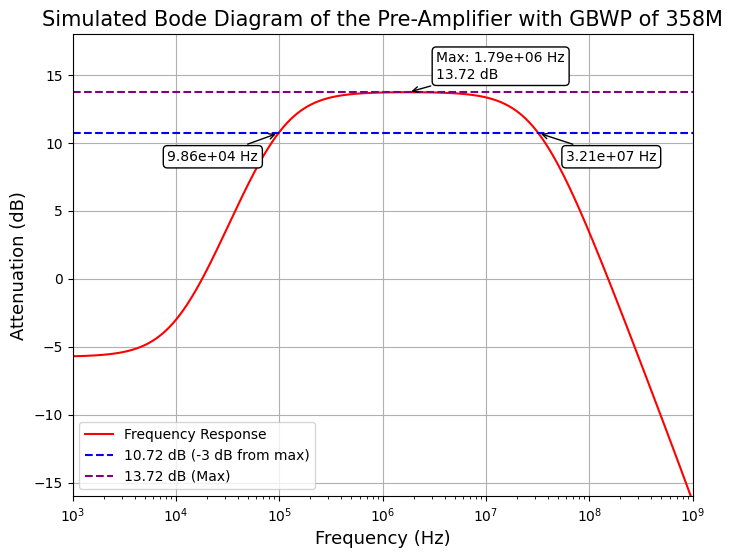

In [28]:
# Read the text file, using tab as the separator, and specify encoding
df = pd.read_csv('/home/lautaro/GitHub/Laboratorio_6_7_ITeDA/Etapa Final de Proyecto/preamp_v2.txt', sep="\t", skiprows=1, names=['Frequency', 'V(out_preamp)'], encoding='ISO-8859-1')

# Extract the first element of V(out_fs), which is the dB value
df['Attenuation'] = df['V(out_preamp)'].apply(lambda x: float(x.split(',')[0][1:].replace('dB', '').strip()))  # Clean the dB part

# Find the frequency with the maximum attenuation
max_attenuation = df['Attenuation'].max()
freq_max_attenuation = df['Frequency'][df['Attenuation'].idxmax()]

# Find -3 dB points relative to the max attenuation
target_attenuation = max_attenuation - 3
df['Diff'] = np.abs(df['Attenuation'] - target_attenuation)
df_sorted = df.sort_values(by='Diff')

# Find the two closest frequencies to the -3 dB points
left_3db_freq = df_sorted[df_sorted['Frequency'] < freq_max_attenuation].iloc[0]['Frequency']
right_3db_freq = df_sorted[df_sorted['Frequency'] > freq_max_attenuation].iloc[0]['Frequency']

# Plotting the Bode diagram
plt.figure(figsize=(8, 6))
plt.plot(df['Frequency'], df['Attenuation'], color='red', label='Frequency Response')
plt.xscale('log')
plt.xlim(1e3, 1e9)
plt.ylim(-16, 18)

# Horizontal line at -3 dB from the maximum attenuation
plt.axhline(y=target_attenuation, color='blue', linestyle='--', label=f'{target_attenuation:.2f} dB (-3 dB from max)')
plt.axhline(y=max_attenuation, color='purple', linestyle='--', label=f'{max_attenuation:.2f} dB (Max)')

# Annotate the maximum attenuation
plt.annotate(f'Max: {freq_max_attenuation:.2e} Hz\n{max_attenuation:.2f} dB', 
             xy=(freq_max_attenuation, max_attenuation), 
             xytext=(20, 10), textcoords='offset points', 
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=10, color='black', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

# Annotate the -3 dB frequencies
for freq, position in [(left_3db_freq, "left"), (right_3db_freq, "right")]:
    plt.annotate(f'{freq:.2e} Hz', 
                 xy=(freq, target_attenuation), 
                 xytext=(-80, -20) if position == "left" else (20, -20), 
                 textcoords='offset points', 
                 arrowprops=dict(facecolor='black', arrowstyle='->'),
                 fontsize=10, color='black', 
                 bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

plt.title('Simulated Bode Diagram of the Pre-Amplifier with GBWP of 358M', size=15)
plt.xlabel('Frequency (Hz)', size=13)
plt.ylabel('Attenuation (dB)', size=13)
plt.grid()
plt.legend(loc='lower left')  # Legend moved to bottom right
plt.savefig('bode_preamp_sim_358.pdf', dpi=1000)
plt.show()

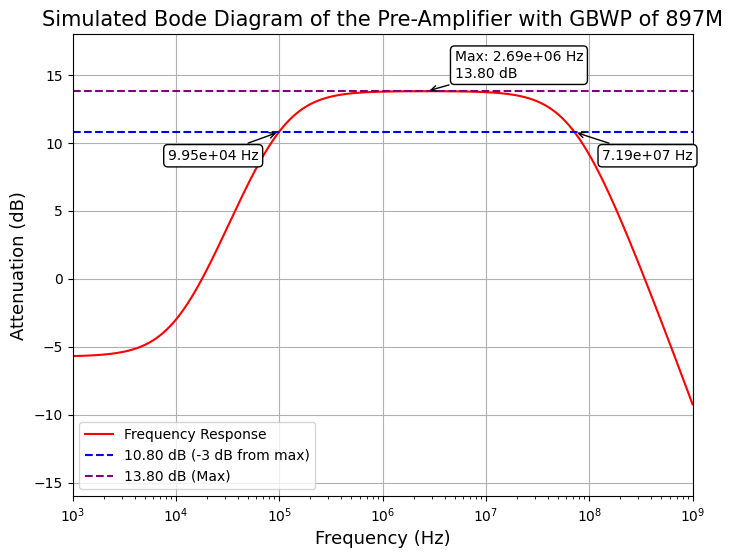

In [25]:
# Read the text file, using tab as the separator, and specify encoding
df = pd.read_csv('/home/lautaro/GitHub/Laboratorio_6_7_ITeDA/Etapa Final de Proyecto/preamp_v1.5.txt', sep="\t", skiprows=1, names=['Frequency', 'V(out_preamp)'], encoding='ISO-8859-1')

# Extract the first element of V(out_fs), which is the dB value
df['Attenuation'] = df['V(out_preamp)'].apply(lambda x: float(x.split(',')[0][1:].replace('dB', '').strip()))  # Clean the dB part

# Find the frequency with the maximum attenuation
max_attenuation = df['Attenuation'].max()
freq_max_attenuation = df['Frequency'][df['Attenuation'].idxmax()]

# Find -3 dB points relative to the max attenuation
target_attenuation = max_attenuation - 3
df['Diff'] = np.abs(df['Attenuation'] - target_attenuation)
df_sorted = df.sort_values(by='Diff')

# Find the two closest frequencies to the -3 dB points
left_3db_freq = df_sorted[df_sorted['Frequency'] < freq_max_attenuation].iloc[0]['Frequency']
right_3db_freq = df_sorted[df_sorted['Frequency'] > freq_max_attenuation].iloc[0]['Frequency']

# Plotting the Bode diagram
plt.figure(figsize=(8, 6))
plt.plot(df['Frequency'], df['Attenuation'], color='red', label='Frequency Response')
plt.xscale('log')
plt.xlim(1e3, 1e9)
plt.ylim(-16, 18)

# Horizontal line at -3 dB from the maximum attenuation
plt.axhline(y=target_attenuation, color='blue', linestyle='--', label=f'{target_attenuation:.2f} dB (-3 dB from max)')
plt.axhline(y=max_attenuation, color='purple', linestyle='--', label=f'{max_attenuation:.2f} dB (Max)')

# Annotate the maximum attenuation
plt.annotate(f'Max: {freq_max_attenuation:.2e} Hz\n{max_attenuation:.2f} dB', 
             xy=(freq_max_attenuation, max_attenuation), 
             xytext=(20, 10), textcoords='offset points', 
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=10, color='black', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

# Annotate the -3 dB frequencies
for freq, position in [(left_3db_freq, "left"), (right_3db_freq, "right")]:
    plt.annotate(f'{freq:.2e} Hz', 
                 xy=(freq, target_attenuation), 
                 xytext=(-80, -20) if position == "left" else (20, -20), 
                 textcoords='offset points', 
                 arrowprops=dict(facecolor='black', arrowstyle='->'),
                 fontsize=10, color='black', 
                 bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

plt.title('Simulated Bode Diagram of the Pre-Amplifier with GBWP of 897M', size=15)
plt.xlabel('Frequency (Hz)', size=13)
plt.ylabel('Attenuation (dB)', size=13)
plt.grid()
plt.legend(loc='lower left')  # Legend moved to bottom right
plt.savefig('bode_preamp_sim_897.pdf', dpi=1000)
plt.show()

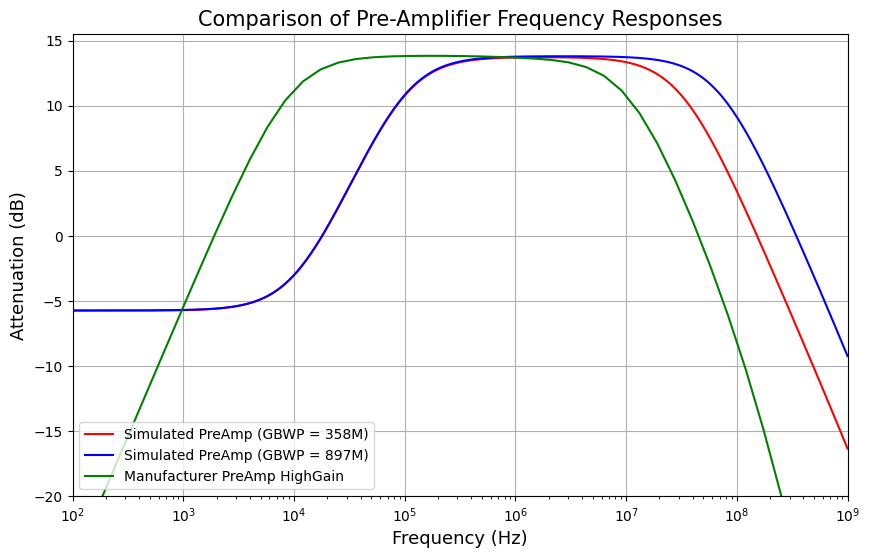

In [42]:
# Load data for the first simulation (GBWP = 358M)
df1 = pd.read_csv('/home/lautaro/GitHub/Laboratorio_6_7_ITeDA/Etapa Final de Proyecto/preamp_v2.txt', 
                  sep="\t", skiprows=1, names=['Frequency', 'V(out_preamp)'], encoding='ISO-8859-1')
df1['Attenuation'] = df1['V(out_preamp)'].apply(lambda x: float(x.split(',')[0][1:].replace('dB', '').strip()))

# Load data for the second simulation (GBWP = 897M)
df2 = pd.read_csv('/home/lautaro/GitHub/Laboratorio_6_7_ITeDA/Etapa Final de Proyecto/preamp_v1.5.txt', 
                  sep="\t", skiprows=1, names=['Frequency', 'V(out_preamp)'], encoding='ISO-8859-1')
df2['Attenuation'] = df2['V(out_preamp)'].apply(lambda x: float(x.split(',')[0][1:].replace('dB', '').strip()))

# Load data for the manufacturer-supplied dataset
df3 = pd.read_csv('/home/lautaro/GitHub/Laboratorio_6_7_ITeDA/Bode-Manufacturer + Código/mag_pahg.csv', 
                  names=("frec", "atenuation"))
df3 = df3.tail(-1)  # Skip the first row
df3 = df3.astype('float')

# Plot all three datasets in one plot
plt.figure(figsize=(10, 6))

# Add each dataset to the plot
plt.plot(df1['Frequency'], df1['Attenuation'], label='Simulated PreAmp (GBWP = 358M)', color='red', linewidth=1.5)
plt.plot(df2['Frequency'], df2['Attenuation'], label='Simulated PreAmp (GBWP = 897M)', color='blue', linewidth=1.5)
plt.plot(df3['frec'], df3['atenuation']-23.2, label='Manufacturer PreAmp HighGain', color='green', linewidth=1.5)

# Customize the plot
plt.xscale('log')  # Logarithmic scale for x-axis
plt.grid(True)  # Add grid
plt.title('Comparison of Pre-Amplifier Frequency Responses', fontsize=15)
plt.xlabel('Frequency (Hz)', fontsize=13)
plt.ylabel('Attenuation (dB)', fontsize=13)
plt.xlim(1e2, 1e9)  # Adjust x-axis limits
plt.ylim(-20, 15.5)  # Adjust y-axis limits for better visualization
plt.legend(loc='lower left')  # Add a legend in the lower-left corner

# Save and display the plot
plt.savefig('comparison_preamp_frequency_responses.pdf', dpi=1000)
plt.show()


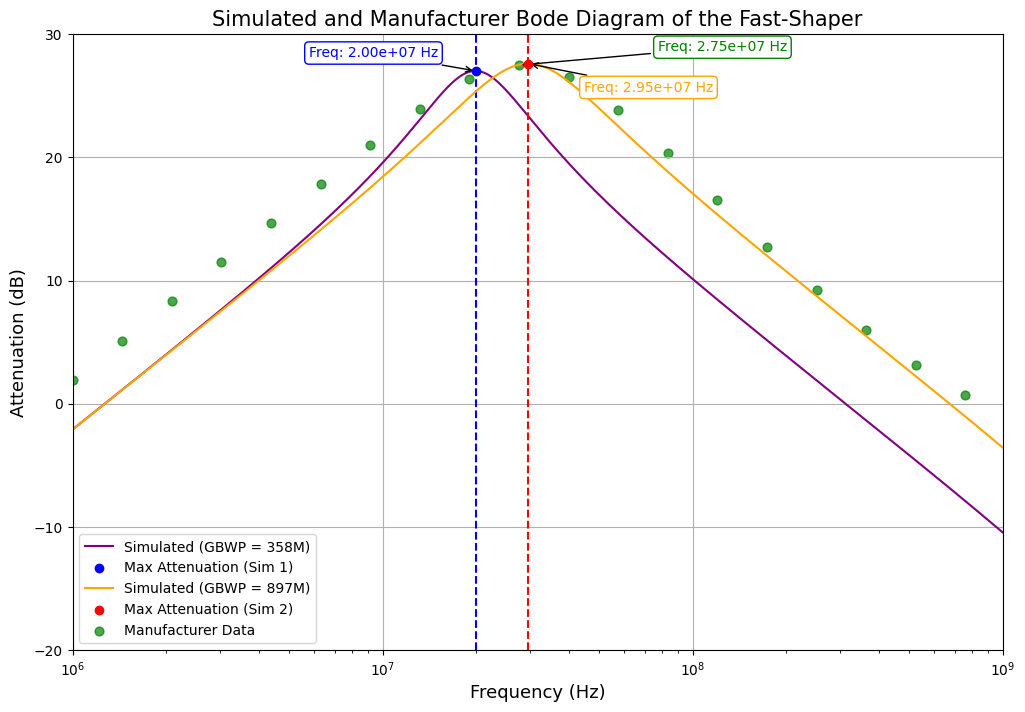

In [98]:
# Load data for the first simulation (GBWP = 358M)
df1 = pd.read_csv('/home/lautaro/GitHub/Laboratorio_6_7_ITeDA/Etapa Final de Proyecto/fastshaper_v2.txt', 
                  sep="\t", skiprows=1, names=['Frequency', 'V(out_preamp)'], encoding='ISO-8859-1')
df1['Attenuation'] = df1['V(out_preamp)'].apply(lambda x: float(x.split(',')[0][1:].replace('dB', '').strip()))

# Find the point with the highest attenuation in simulation 1
max_attenuation_idx_1 = df1['Attenuation'].idxmax()
max_attenuation_freq_1 = df1['Frequency'].iloc[max_attenuation_idx_1]
max_attenuation_value_1 = df1['Attenuation'].iloc[max_attenuation_idx_1]

# Load data for the second simulation (GBWP = 897M)
df2 = pd.read_csv('/home/lautaro/GitHub/Laboratorio_6_7_ITeDA/Etapa Final de Proyecto/fastshaper_v1.5.txt', 
                  sep="\t", skiprows=1, names=['Frequency', 'V(out_preamp)'], encoding='ISO-8859-1')
df2['Attenuation'] = df2['V(out_preamp)'].apply(lambda x: float(x.split(',')[0][1:].replace('dB', '').strip()))

# Find the point with the highest attenuation in simulation 2
max_attenuation_idx_2 = df2['Attenuation'].idxmax()
max_attenuation_freq_2 = df2['Frequency'].iloc[max_attenuation_idx_2]
max_attenuation_value_2 = df2['Attenuation'].iloc[max_attenuation_idx_2]

# Load manufacturer data
df_manufacturer = pd.read_csv('/home/lautaro/GitHub/Laboratorio_6_7_ITeDA/Bode-Manufacturer + Código/mag_fasthaper.csv', 
                               names=("frec", "atenuation"))
df_manufacturer = df_manufacturer.tail(-1).astype('float')  # Remove header and ensure numeric type

# Find the point with the highest attenuation for manufacturer data
max_manufacturer_idx = df_manufacturer['atenuation'].idxmax()

# Manually choose the previous point if it exists
if max_manufacturer_idx > 0:
    max_manufacturer_idx -= 1

max_manufacturer_freq = df_manufacturer['frec'].iloc[max_manufacturer_idx]
max_manufacturer_value = df_manufacturer['atenuation'].iloc[max_manufacturer_idx]

# Create and configure the figure before plotting
plt.figure(figsize=(12, 8))  # Adjust width and height in inches

# Plotting the datasets
# Simulation 1
plt.plot(df1['Frequency'], df1['Attenuation'], label='Simulated (GBWP = 358M)', color='purple', linewidth=1.5)
plt.scatter(max_attenuation_freq_1, max_attenuation_value_1, color='blue', zorder=5, label='Max Attenuation (Sim 1)')
plt.axvline(x=max_attenuation_freq_1, color='blue', linestyle='--')

# Simulation 2
plt.plot(df2['Frequency'], df2['Attenuation'], label='Simulated (GBWP = 897M)', color='orange', linewidth=1.5)
plt.scatter(max_attenuation_freq_2, max_attenuation_value_2, color='red', zorder=5, label='Max Attenuation (Sim 2)')
plt.axvline(x=max_attenuation_freq_2, color='red', linestyle='--')

# Manufacturer data as scatter plot (adjust attenuation by +4 for plotting)
plt.scatter(df_manufacturer['frec'], df_manufacturer['atenuation'] + 4, 
            label='Manufacturer Data', color='green', s=40, alpha=0.7)

# Manufacturer annotation (adjust for +4 shift)
plt.annotate(
    f'Freq: {max_manufacturer_freq:.2e} Hz',  # Only frequency
    xy=(max_manufacturer_freq, max_manufacturer_value + 4),  # Adjusted for the +4 shift
    xytext=(100, 10),  # Offset in points
    textcoords='offset points',
    arrowprops=dict(facecolor='green', arrowstyle='->'),
    fontsize=10,
    color='green',
    bbox=dict(facecolor='white', edgecolor='green', boxstyle='round,pad=0.3')
)

# Simulation 1 annotation
plt.annotate(
    f'Freq: {max_attenuation_freq_1:.2e} Hz',  # Only frequency
    xy=(max_attenuation_freq_1, max_attenuation_value_1),
    xytext=(-120, 10),  # Adjust offset
    textcoords='offset points',
    arrowprops=dict(facecolor='blue', arrowstyle='->'),
    fontsize=10,
    color='blue',
    bbox=dict(facecolor='white', edgecolor='blue', boxstyle='round,pad=0.3')
)

# Simulation 2 annotation
plt.annotate(
    f'Freq: {max_attenuation_freq_2:.2e} Hz',  # Only frequency
    xy=(max_attenuation_freq_2, max_attenuation_value_2),
    xytext=(40, -20),  # Adjust offset
    textcoords='offset points',
    arrowprops=dict(facecolor='orange', arrowstyle='->'),
    fontsize=10,
    color='orange',
    bbox=dict(facecolor='white', edgecolor='orange', boxstyle='round,pad=0.3')
)

# Customizing the plot
plt.xscale('log')  # Logarithmic scale for x-axis
plt.xlim(1e6, 1e9)  # Adjust x-axis limits
plt.ylim(-20, 30)  # Adjust y-axis limits for better visualization
plt.grid(True)  # Add grid
plt.title('Simulated and Manufacturer Bode Diagram of the Fast-Shaper', fontsize=15)
plt.xlabel('Frequency (Hz)', fontsize=13)
plt.ylabel('Attenuation (dB)', fontsize=13)
plt.legend(loc='lower left')  # Add a legend in the lower-left corner

# Save and display the plot
plt.savefig('simulations_and_manufacturer_comparison.pdf', dpi=1000)
plt.show()

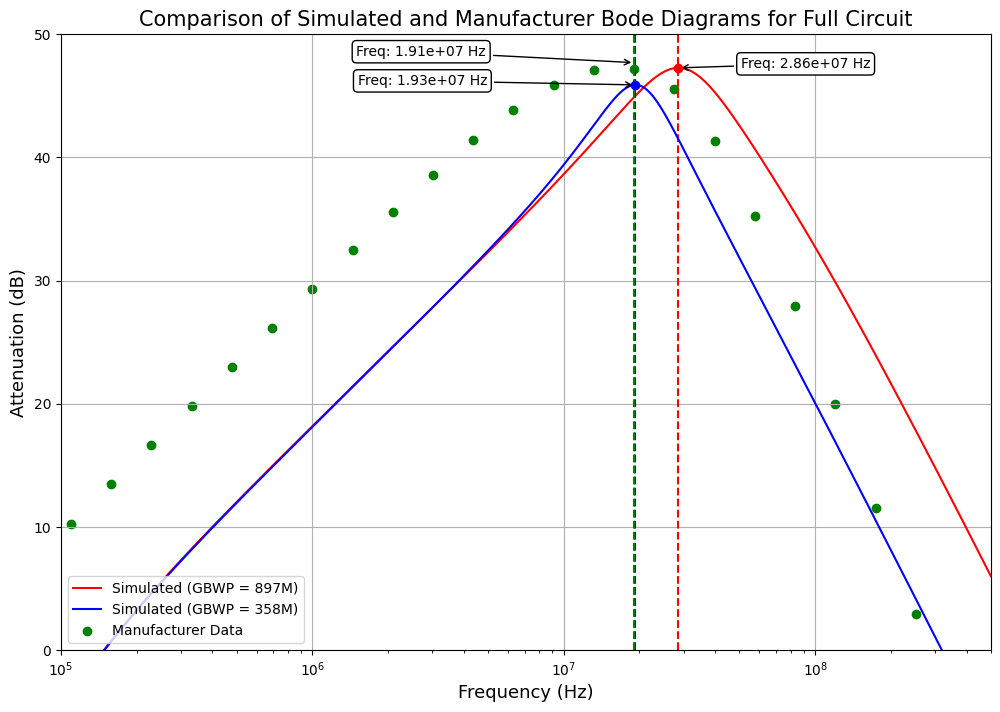

In [127]:
# Load the first data file (Version 1.5)
df_v15 = pd.read_csv(
    '/home/lautaro/GitHub/Laboratorio_6_7_ITeDA/Etapa Final de Proyecto/bode_circuito_completo_con_capacitores_en_preamp_inversor_v1,5.txt',
    sep="\t", skiprows=1, names=['Frequency', 'V(out)'], encoding='ISO-8859-1'
)
df_v15['Attenuation'] = df_v15['V(out)'].apply(lambda x: float(x.split(',')[0][1:].replace('dB', '').strip())) + 6.5

# Find the peak attenuation for Version 1.5
max_v15_idx = df_v15['Attenuation'].idxmax()
max_v15_freq = df_v15['Frequency'].iloc[max_v15_idx]
max_v15_value = df_v15['Attenuation'].iloc[max_v15_idx]

# Load the second data file (Version 2.0)
df_v2 = pd.read_csv(
    '/home/lautaro/GitHub/Laboratorio_6_7_ITeDA/Etapa Final de Proyecto/bode_circuito_completo_con_capacitores_en_preamp_inversor_v2.txt',
    sep="\t", skiprows=1, names=['Frequency', 'V(out)'], encoding='ISO-8859-1'
)
df_v2['Attenuation'] = df_v2['V(out)'].apply(lambda x: float(x.split(',')[0][1:].replace('dB', '').strip())) + 6.5

# Find the peak attenuation for Version 2.0
max_v2_idx = df_v2['Attenuation'].idxmax()
max_v2_freq = df_v2['Frequency'].iloc[max_v2_idx]
max_v2_value = df_v2['Attenuation'].iloc[max_v2_idx]

# Load manufacturer data
df_manufacturer = pd.read_csv(
    '/home/lautaro/GitHub/Laboratorio_6_7_ITeDA/Bode-Manufacturer + Código/mag_fschain.csv', 
    names=("frec", "atenuation")
)
df_manufacturer = df_manufacturer.tail(-1).astype('float')  # Remove header and ensure numeric type

# Find the peak attenuation for manufacturer data (manual adjustment to pick previous point)
max_manufacturer_idx = df_manufacturer['atenuation'].idxmax() - 1  # Move to the previous point
max_manufacturer_freq = df_manufacturer['frec'].iloc[max_manufacturer_idx]
max_manufacturer_value = df_manufacturer['atenuation'].iloc[max_manufacturer_idx]

# Create a larger figure
plt.figure(figsize=(12, 8))  # Set width and height in inches

# Plotting the Version 1.5 data
plt.plot(df_v15['Frequency'], df_v15['Attenuation'], color='red', label='Simulated (GBWP = 897M)')
plt.scatter(max_v15_freq, max_v15_value, color='red', zorder=5)
plt.axvline(x=max_v15_freq, color='red', linestyle='--')
plt.annotate(f'Freq: {max_v15_freq:.2e} Hz', 
             xy=(max_v15_freq, max_v15_value), 
             xytext=(45, 0),  # Adjusting to the left side
             textcoords='offset points', 
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=10, color='black', 
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

# Plotting the Version 2.0 data
plt.plot(df_v2['Frequency'], df_v2['Attenuation'], color='blue', label='Simulated (GBWP = 358M)')
plt.scatter(max_v2_freq, max_v2_value, color='blue', zorder=5)
plt.axvline(x=max_v2_freq, color='blue', linestyle='--')
plt.annotate(f'Freq: {max_v2_freq:.2e} Hz', 
             xy=(max_v2_freq, max_v2_value), 
             xytext=(-200, 0), 
             textcoords='offset points', 
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=10, color='black', 
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

# Plotting the manufacturer data
plt.scatter(df_manufacturer['frec'], df_manufacturer['atenuation']-5.5, color='green', label='Manufacturer Data')
plt.axvline(x=max_manufacturer_freq, color='green', linestyle='--')
plt.annotate(f'Freq: {max_manufacturer_freq:.2e} Hz', 
             xy=(max_manufacturer_freq, max_manufacturer_value-5),  # Adjust y position for clarity
             xytext=(-200, 5),  # Adjust the offset to prevent overlap
             textcoords='offset points', 
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=10, color='black', 
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

# Set titles and labels
plt.title('Comparison of Simulated and Manufacturer Bode Diagrams for Full Circuit', fontsize=15)
plt.xlabel('Frequency (Hz)', fontsize=13)
plt.ylabel('Attenuation (dB)', fontsize=13)
plt.legend(loc='lower left')  # Add a legend in the lower-left corner
plt.xscale('log')  # Set x-axis to log scale
plt.xlim(1e5, 5e8)  # Adjust the x-axis limits
plt.ylim(0, 50)  # Adjust the y-axis limits
plt.grid(True)  # Add grid

# Save and display the plot
plt.savefig('bode_diagram_comparison_with_manufacturer.pdf', dpi=1000)
plt.show()
